# Processamento de linguagem natural e modelo de análise de sentimento.

A fim de que seja possível comparar os tópicos abaixo descritos com os itens explicitados pelo barema, encontra-se, nessa célula, um índice comparativo entre ambas partes. Ele foi feito para facilitar a correção dos professores e permitir a existência de uma autonomia na nomenclatura das células de organização. 
- Instalação -> tópico 1.0
- Testes isolados - >  tópico 3.8 
- Definição de funções -> tópico 3.1 a 3.7
- Testes das funções -> tópico 4.3
- Análise descritiva -> tópico 2.0
- Pré processamento -> tópico 3.0
- Pipeline -> tópico 4.3
- Modelo Bag of words -> tópico 4.0


## 1.0 Instalação

Nessa parte do notebook realiza-se a instalação das bibliotecas que serão utilizadas no decorrer do código, bem como a importação da base de dados que baseia todas as posteriores análises. 

### 1.1 Importação das bibliotecas

In [ ]:
# instalação de pacotes para remoção de acentos
!pip install unidecode
# Instalando biblioteca Python "emoji"
!pip install emoji
# Instalação de biblioteca para remoção de stop words
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 3.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=001dadef6864a4ea28423a75ffc89168dac7c4032313cf27e1835b3290a4bc96
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled 

In [ ]:
#importação das bibliotecas:
import pandas as pd
import numpy as np
# bibliotecas utilizadas para tokenização
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
#biblioteca para tokenização 
from keras.preprocessing.text import Tokenizer
# bibliotecas utilizadas para remoção de stop words
import nltk
nltk.download('punkt')
#importação das bibliotecas para remoção de Stop Words
import spacy
nlp = spacy.cli.download('pt_core_news_sm')
nlp = spacy.load('pt_core_news_sm')
# bibliotecas para remoção de acentos
from unidecode import unidecode
# bibliotecas utilizadas para o tratamento de abreviações
import re
# Instalando biblioteca Python "emoji"
import emoji
# importação de biblioteca para exportação do modelo
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


### 1.2 Criação da tabela 

##### Importação da tabela

In [ ]:
#importação da base de dados:
df = pd.read_excel('../bases/2-base_10052023-G1.xlsx')
df

,id,"""dataPublicada""","""autor""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12350,3044013,"""2022-11-30 11:51:00""",onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0
12351,3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12352,3044213,"""2022-11-30 12:18:00""",jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12353,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


##### Colunas renomeadas

In [ ]:
novasColunas = {'"dataPublicada"': 'dataPublicada', '"autor"': 'autor', '"texto"': 'texto', '"sentimento"':'sentimento', '"tipoInteracao"':'tipoInteracao', '"anomalia"':'anomalia', '"probabilidadeAnomalia"': 'probabilidadeAnomalia', '"linkPost"':'linkPost', '"processado"': 'processado', '"contemHyperlink"': 'contemHyperlink'}
df = df.rename(columns=novasColunas)
df


,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12350,3044013,"""2022-11-30 11:51:00""",onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0
12351,3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12352,3044213,"""2022-11-30 12:18:00""",jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12353,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


##### Remoção de colunas que não possuem textos

In [ ]:
#remoção de todas as linhas que não possuem a coluna texto:
df = df.dropna(subset=['texto'])
df

,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12350,3044013,"""2022-11-30 11:51:00""",onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0
12351,3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12352,3044213,"""2022-11-30 12:18:00""",jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12353,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


##### Remoção de linhas que possuem anomalias

In [ ]:
df = df[df['anomalia'] != 1]

##### Remoção de comentários do banco BTG

In [ ]:
df = df[df['autor'] != 'btgpactual']
df

,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
5,6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12346,3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12349,3044012,"""2022-11-30 12:00:00""",danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação,0,44,https://www.instagram.com/p/Cllt7_nOTBc/,0,0
12351,3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12353,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


##### Remoção de linhas que possuem hyperlink

In [ ]:
df = df[df['contemHyperlink'] != 1]
df

,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
5,6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12346,3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12349,3044012,"""2022-11-30 12:00:00""",danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação,0,44,https://www.instagram.com/p/Cllt7_nOTBc/,0,0
12351,3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12353,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


##### Remoção de linhas que possuem probabilidade de anomalia maior que 50%

In [ ]:
df = df[df['probabilidadeAnomalia'] <= 50]
df = df.reset_index(drop=True)
df

,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
0,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
1,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
2,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
3,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
4,6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9482,3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
9483,3044012,"""2022-11-30 12:00:00""",danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação,0,44,https://www.instagram.com/p/Cllt7_nOTBc/,0,0
9484,3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
9485,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


## 3.0 Pré processamento dos dados

O pré processamento dos dados é uma técnica que consiste em uma série de etapas que buscam preparar os dados para uma análise posterior, eliminando informações desnecessárias, corrigindo erros e padronizando o formato dos dados. 
Essa é uma etapa muito importante porque, muitas vezes, dados textuais são frequentemente não estruturados, o que significa que não seguem um formato padronizado ou organizado, dificultando a análise e extração de informações relevantes.

### 3.1 Remoção de acentos

Para garantir que um texto seja processado de forma consistente, é importante realizar a normalização dos seus componentes. Nesse sentido, a remoção de acentos é uma etapa fundamental, já que isso ajuda o algoritmo a compreender com mais precisão o que o texto está dizendo. Além disso, a ausência de acentos reduz o risco de que o algoritmo interprete de maneira diferente duas palavras idênticas, mas que tenham sido acentuadas de formas distintas ou incorretas. Em resumo, a remoção de acentos é uma prática essencial no pré-processamento de textos para aprimorar a qualidade e a eficácia da análise de dados em linguagem natural.

In [ ]:
#Código para remoção dos acentos
def remocaoAcentos(dataframe):
    dataframe = dataframe.applymap(lambda x: unidecode(str(x)))
    return dataframe

Teste isolado

### 3.2 Remoção letras maiusculas

O tratamento de letras maiúsculas é importante porque, muitas vezes, a diferença entre letras maiúsculas e minúsculas pode impactar negativamente a análise do algoritmo, tendo em vista que ele pode interpretar as palavras como diferentes em determinadas situações. Esse problema pode levar a resultados imprecisos, tendo em vista que, diante do objetivo de contar a frequência de palavras, essas diferenças garantem que as palavras sejam contadas de maneira distinta. 

In [ ]:
def tratamentoMaiusculas(dataframe):
    # Pré-processamento das letras maiúsculas
    dataframe = dataframe.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    # Exibição dos dados pré-processados
    return dataframe

Teste isolado

### 3.3 Lematização

A lematização é uma técnica utilizada a fim de reduzir palavras flexionadas para sua forma básica. Ela representa as palavras através do infinitivo dos verbos e singular dos substantivos e adjetivos. Esse processo também leva em consideração o contexto inserido de cada palavra e resolve o problema da ambiguidade lexical, onde uma mesma palavra pode ter múltiplos significados.

In [ ]:
# Função de lematização
def textoLemmatizado(coluna):
    textosLemmatizados = []
    for texto in coluna:
        # Processa o texto com o modelo do Spacy
        doc = nlp(texto)
        # Lematiza cada token no documento
        lemmas = [token.lemma_ for token in doc]
        # Junta os lemmas em um único texto
        textoLemmatizado = ' '.join(lemmas)
        textosLemmatizados.append(textoLemmatizado)
    return textosLemmatizados

### 3.4 Tratamento de emojis

Emojis são muito utilizados por usuários de redes sociais, ajudando-os, assim, a expressar emoções e sentimentos. Portanto, para melhor entender o sentido de uma mensagem, o tratamento de emojis podem fornecer uma melhor precisão para a análise e uma classificação mais precisa dos sentimentos de uma mensagem.

In [ ]:
# Função para converter emojis em texto.
# A função recebe dois argumentos. O dataframe e a coluna a ser tratada, e retorna o dataframe.
def conversaoEmojis(coluna):
    coluna = coluna.apply(emoji.demojize)
    return coluna

### 3.5 Tratamento de abreviações e pontuações

O tratamento de abreviações é importante porque garante que o algoritmo de processamento de linguagem natural interprete corretamente o significado do texto. Ao substituir abreviações por suas formas completas, o texto se torna mais legível e compreensível para o algoritmo que realizará o processamento.

In [ ]:
   
def tratamentoAbreviacoes(coluna):    
    coluna = coluna.astype(str)
    coluna.str.lower()
# Dicionário com as abreviações e suas expansões
    abreviacoes = {
        r'\bvc\b': 'você',
        r'\btbm\b': 'também',
        r'\bpq\b': 'porque',
        r'\bmt\b': 'muito',
        r'\bmto\b':'muito',
        r'\bblz\b': 'beleza',
        r'\bjah\b': 'já',
        r'\bbj\b': 'beijo',
        r'\bflw\b': 'falou',
        r'\bvlw\b': 'valeu',
        r'\bkrl\b': 'caralho',
        r'\bqnd\b': 'quando',
        r'\bfds\b': 'fim de semana',
        r'\bqq\b': 'qualquer',
        r'\bmsg\b': 'mensagem',
        r'\bpra\b': 'para',
        r'\bp\b': 'para',
        r'\bpqp\b': 'puta que pariu',
        r'\bvlh\b': 'velho',
        r'\bnss\b': 'nossa',
        r'\bngm\b': 'ninguém',
        r'\bqm\b': 'quem',
        r'\bobs\b': 'observação',
        r'\bqt\b': 'quanto',
        r'\btbm ñ\b': 'também não',
        r'\bpf\b': 'por favor',
        r'\bpdc\b': 'pode crer',
        r'\btalkei\b': 'ok',
        r'\bd+\b': 'demais',
        r'\bdms\b': 'demais',
        r'\bsqn\b': 'só que não',
        r'\bmsm\b': 'mesmo',
        r'\bn/ao\b': 'não',
        r'\bn/\b': 'não',
        r'\bblz\b': 'beleza',
        r'\bq\b': 'que',
        r'\btd\b': 'tudo',
        r'\bpfvr\b': 'por favor',
        r'\bgnt\b': 'gente',
        r'\bto\b': 'estou',
        r'\bvcs\b': 'vocês',
        r'\bn/oa\b': 'não',
        r'\bsla\b': 'sei lá',
        r'\bflws\b': 'falou',
        r'\bbjos\b': 'beijos',
        r'\bkd\b': 'cadê',
        r'\blgl\b': 'legal',
        r'\bnum\b': 'número',
        r'\bjá q\b': 'já que',
        r'\bmano\b': 'irmão',
        r'\bpke\b': 'porque',
        r'\bpr\b': 'para',
        r'\btpm\b': 'tensão pré-menstrual',
        r'\btá\b': 'está',
        r'\bqmto\b': 'muito',
        r'\bñ\b': 'não',
        r'\bvamu\b': 'vamos',
        r'\btmj\b': 'estamos juntos',
        r'[0-9]': '',
        r'@\w+': '',
        r'[^\w\s]': '',
        r'\bwww\.[^\s]*': '',
        r'\bola\b': '',
        r'\n': '',
        r'\bbtg\b': '',
        r'\bpactual\b': ''
    }

    # Aplica a substituição de cada abreviação no dataframe
    for abreviacao, expansao in abreviacoes.items():
        coluna= coluna.apply(lambda x: re.sub(abreviacao, expansao, x, flags=re.IGNORECASE))
    
    return coluna

### 3.6 Tokenização

A tokenização é um processo de pré-processamento utilizado para dividir os valores de uma coluna em pedaços menores, como palavras ou frases. Cada pedaço, conhecido como token, recebe um valor específico para identificação. Esse processo torna o texto mais gerenciável e facilita a análise e os processamentos subsequentes dos dados.

Função para gerar um dicionario, com os tokens

In [ ]:
#definição de função para tokenização em palavras
def tokenizacaoPalavra(comentarios):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(comentarios)
  return tokenizer

Tokenização por frase

In [ ]:
# definição de função para tokenização em frases
def tokenizacaoFrase(coluna):
  comentarios = coluna.values
  tokenFrase = []
  for comentarios in comentarios:
    tokenFrase.append(sent_tokenize(comentarios))
  return tokenFrase

Função para gerar tokens de palavras, referentes a cada frase

In [ ]:
def tokenizar(coluna):
    # Tokeniza as frases
    tokensPalavras = nltk.word_tokenize(coluna)
    return tokensPalavras

Testes isolados:

Geração de dicionario.

### 3.7 Remoção de stopwords


A remoção dos Stop Words é um pré-processamento importante pois elimina palavras irrelevantes que podem prejudicar a precisão do modelo final, como artigos, preposições, conjunções, entre outros conectores. Esse tratamento ajuda na eficácia da classificação de texto  e na redução tanto do vocabulário quanto de ruídos (palavras que não têm um valor semântico significativo).

In [ ]:
def remocaoStopWords(coluna):
    listaSemStopWords = []
    for texto in coluna:
        # converte o texto em um documento do Spacy
        doc = nlp(texto)
        # filtra os tokens que não são stop words
        tokenSemStopwords = [token.text for token in doc if not token.is_stop]
        # adiciona a lista de frases sem stop words
        listaSemStopWords.append(' '.join(tokenSemStopwords))
    # substitui a coluna original pelos textos sem stop words
    coluna[:] = listaSemStopWords
    return coluna

### 3.9 Pipeline dos pré processamentos

Criação de pipiline para tratamento dos dados.

In [ ]:
def pipeline(dados):
  #cria um novo df a ser tratado
  dadosT =  pd.DataFrame({'dadosTratados': dados})
  # remove os acentos dos dados
  dadosT['dadosTratados'] = remocaoAcentos(dadosT) 
  # substituição das letras maiusculas dos dados
  dadosT['dadosTratados'] = tratamentoMaiusculas(dadosT)
  ## tratamento dos emojis
  #dadosT = conversaoEmojis(dadosT)
  #tratamento de abreviações 
  dadosT['dadosTratados'] = tratamentoAbreviacoes(dadosT['dadosTratados'])
  ##tratamento de stopwords
  dadosT['dadosTratados'] = remocaoStopWords(dadosT['dadosTratados'])
  return dadosT['dadosTratados']

#### 3.9.1 Resultado dos pré processamentos.

## 5.0 Word2vec pré - treinado

### 5.1 Setup do modelo

In [ ]:
#setup
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

In [ ]:
#Carregando o modelo
modelo_cbow = KeyedVectors.load_word2vec_format("../bases/cbow_s50.txt")

### 5.2 definição de funções

In [ ]:
def word2Vec(coluna):
# lista que armazena os vetores resultantes de todas as frases
  x = []
  for i in range(0,len(coluna)):
# lista que armazena os vetores das palavras de cada frase
    vetor = []
    for h in range(0,len(coluna[i])):
      vetor.append(modelo_cbow[h])
# soma dos vetores de todas as palavras 
    x.append(list(map(sum, zip(*vetor))))
    vetor=[]
  print(x)
  return x

### 5.3 teste da funções

In [ ]:
# chama a função Word2Vec para testá-la
testeword2Vec = word2Vec(df['texto'].apply(tokenizar))
#criação de um Dataframe para visualizar o resultado
dfTesteword2Vec = pd.DataFrame(testeword2Vec)
dfTesteword2Vec

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.514310,-7.478573,-1.852811,-7.445124,-0.900545,-0.450863,-0.844640,0.129873,-6.139715,-6.840437,...,-0.747759,-7.420995,1.201510,-0.225418,2.372435,6.523726,1.322155,0.077827,-5.811534,6.145944
1,-0.371537,-8.584228,-2.384340,-7.285557,-0.582353,-0.765648,-1.334225,0.468803,-5.871632,-7.197826,...,-0.219864,-7.189882,0.198363,-0.475961,3.055253,6.169072,0.200981,0.169087,-7.673683,6.896269
2,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,-0.363125,...,-0.179132,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131
3,0.047435,-0.007625,0.173723,-0.445078,-0.058977,-0.182599,-0.079506,-0.220796,-0.265243,-0.346969,...,-0.012755,-0.238091,0.309302,-0.140818,-0.078406,-0.180135,0.013944,-0.043409,0.288535,0.232324
4,1.075528,-0.879334,0.146983,-2.114522,0.822631,-0.225273,-0.192567,-1.433440,-2.440478,-1.470971,...,0.587403,-2.146278,0.094727,-0.327286,0.427182,0.367773,-0.884387,0.805210,0.683840,1.651200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,0.572639,-0.125299,-0.170976,-1.169875,0.079236,0.001395,-0.204402,-0.515468,-1.489781,-0.363050,...,0.099337,-1.236094,0.378341,-0.582291,-0.087733,0.685860,-0.503743,0.184030,0.816723,0.928673
9483,-0.175089,-7.093212,-1.770549,-7.163111,-1.447110,-0.746501,-0.146332,0.185476,-5.884923,-6.602993,...,-0.692300,-7.748579,1.333975,0.273490,2.190751,6.459354,0.951604,0.148626,-5.948199,6.262340
9484,-1.227343,-8.025073,-5.392955,-6.965629,4.477837,-1.817244,-3.185648,2.470718,-5.347249,-9.338262,...,-0.635413,-5.189282,-2.728264,0.192428,6.617338,8.040454,-2.140488,-1.201420,-11.837457,2.845104
9485,1.730446,-10.583965,-5.965667,-7.616147,6.894613,-2.380157,-3.365684,3.469364,-1.747959,-7.804751,...,-0.918631,-0.695320,-7.331540,0.490277,11.974003,9.637973,-0.909810,-4.649925,-17.022641,0.733577


### 5.4 Teste isolado

Esses teste tem como objetivo comprovar que os vetores estão sendo corretamente somados

O codigo abaixo ainda não soma os vetores de cada palvra da frase

In [ ]:
#teste que converte palavras em vetores e retorna uma lista de vetores resultantes
def word2Vecteste(coluna):
#armazena os vetores resultantes
  x = []
  for i in range(0,len(coluna)):
    vetor = []
#armazena todos os vetores de todas as palavras
    for h in range(0,len(coluna[i])):
      vetor.append(modelo_cbow[h])
    x.append(vetor)
    vetor=[]
  print(x)
  return x

Abaixo esta sendo executado o teste da função

In [ ]:
# gera os vetores das 10 primeiras frases
testeSoma = word2Vecteste(df['texto'].apply(tokenizar).head(10))
#criação de um dataframe para retornar o valor do 'testeSoma' que contém a lista de vetores resultantes
dftesteSoma = pd.DataFrame(testeSoma)
testeSoma

[[array([-0.01    , -0.000949, -0.000157,  0.007802, -0.004775,  0.00916 ,
        0.000275,  0.003503,  0.002693, -0.000599,  0.002116,  0.007509,
        0.006414,  0.003036,  0.003444,  0.005029, -0.005577, -0.007318,
        0.001901,  0.007887, -0.00672 ,  0.008236, -0.000243, -0.009482,
        0.002523, -0.004002, -0.009337, -0.004473,  0.009624,  0.006939,
       -0.00016 ,  0.002124,  0.00215 , -0.003164, -0.003439, -0.009075,
       -0.009343, -0.00982 ,  0.009702, -0.009068, -0.006134, -0.008558,
        0.006518, -0.006201,  0.003556,  0.004342,  0.003762, -0.002697,
       -0.006839,  0.001996], dtype=float32), array([ 0.094044,  0.195893, -0.155718, -0.449506, -0.160736,  0.000748,
       -0.138087, -0.004585, -0.121695, -0.087401,  0.018703,  0.081959,
        0.106759, -0.016001, -0.009896, -0.162624,  0.014549,  0.010382,
        0.208517, -0.02957 ,  0.180953,  0.132365,  0.019936, -0.040737,
        0.019822,  0.131696, -0.08243 , -0.09606 ,  0.158126, -0.151579,
   

[[array([-0.01    , -0.000949, -0.000157,  0.007802, -0.004775,  0.00916 ,
          0.000275,  0.003503,  0.002693, -0.000599,  0.002116,  0.007509,
          0.006414,  0.003036,  0.003444,  0.005029, -0.005577, -0.007318,
          0.001901,  0.007887, -0.00672 ,  0.008236, -0.000243, -0.009482,
          0.002523, -0.004002, -0.009337, -0.004473,  0.009624,  0.006939,
         -0.00016 ,  0.002124,  0.00215 , -0.003164, -0.003439, -0.009075,
         -0.009343, -0.00982 ,  0.009702, -0.009068, -0.006134, -0.008558,
          0.006518, -0.006201,  0.003556,  0.004342,  0.003762, -0.002697,
         -0.006839,  0.001996], dtype=float32),
  array([ 0.094044,  0.195893, -0.155718, -0.449506, -0.160736,  0.000748,
         -0.138087, -0.004585, -0.121695, -0.087401,  0.018703,  0.081959,
          0.106759, -0.016001, -0.009896, -0.162624,  0.014549,  0.010382,
          0.208517, -0.02957 ,  0.180953,  0.132365,  0.019936, -0.040737,
          0.019822,  0.131696, -0.08243 , -0.09606 ,

#### Comprovação

Abaixo e possivel ver a 3 coluna do df['texto'], que sera utilizada como exemplo para esse teste.

In [ ]:
df['texto'][3]

'@ricktolledo Sim'

Abaixo e possivel ver o vetor de cada palavra da coluna 3 do df['texto'], que sera utilizada como exemplo para esse teste.

In [ ]:
testeSoma[3]

[array([-0.01    , -0.000949, -0.000157,  0.007802, -0.004775,  0.00916 ,
         0.000275,  0.003503,  0.002693, -0.000599,  0.002116,  0.007509,
         0.006414,  0.003036,  0.003444,  0.005029, -0.005577, -0.007318,
         0.001901,  0.007887, -0.00672 ,  0.008236, -0.000243, -0.009482,
         0.002523, -0.004002, -0.009337, -0.004473,  0.009624,  0.006939,
        -0.00016 ,  0.002124,  0.00215 , -0.003164, -0.003439, -0.009075,
        -0.009343, -0.00982 ,  0.009702, -0.009068, -0.006134, -0.008558,
         0.006518, -0.006201,  0.003556,  0.004342,  0.003762, -0.002697,
        -0.006839,  0.001996], dtype=float32),
 array([ 0.094044,  0.195893, -0.155718, -0.449506, -0.160736,  0.000748,
        -0.138087, -0.004585, -0.121695, -0.087401,  0.018703,  0.081959,
         0.106759, -0.016001, -0.009896, -0.162624,  0.014549,  0.010382,
         0.208517, -0.02957 ,  0.180953,  0.132365,  0.019936, -0.040737,
         0.019822,  0.131696, -0.08243 , -0.09606 ,  0.158126, -0

Como e possivel observar a primeira linha de cada correspondem ao valores -0.01, 0.094044, -0.036609

Abaixo e possivel visualizar o resultado da soma vetorial, no caso 0.047435

In [ ]:
dfTesteword2Vec[0][3]

0.04743499867618084

In [ ]:
testeSomaExemplo = - 0.01 + 0.094044 - 0.036609
testeSomaExemplo

0.047435000000000005

Como é possível observar, utilizando esse exemplo da coluna 3, a soma dos vetores das 3 palavras e 0.047435, assim como é possível observar no resultado da função original. Comprovando assim que a soma vetorial foi executada de forma correta.

### 5.5 Modelo Word2vec pré - treinado

#### 5.5.1 definição

Abaixo e definido modelo word2vec, funcionando em conjunto com a pipeline.

In [ ]:
def modeloWord2Vec(coluna):
  #Recebe os dados a ser realizado o BOW
  frases = pipeline(coluna)
  #Cria os tokens a serem utilizados pelo modelo
  frases = frases.apply(tokenizar)
  #aplica a função de word2vec
  vetores = word2Vec(frases)
  #retorna o reusltado
  return vetores

#### 5.5.2 teste

Abaixo e possivel vizualisar o modelo word2vec, funcionando em conjunto com a pipeline

In [ ]:
resultadoModeloWord2Vec= modeloWord2Vec(df['texto'])

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



####  5.5.3 Criando dataframe 

In [ ]:
dfresultadoModeloWord2Vec = pd.DataFrame(resultadoModeloWord2Vec)
dfresultadoModeloWord2Vec


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.383377,-2.654717,-1.405555,-3.668075,0.229193,0.304061,-1.807550,-0.759527,-4.674443,-4.022112,...,0.220864,-3.715628,-0.508049,-1.681060,0.322339,3.070996,-1.145615,-0.220174,-1.008628,4.302267
1,1.283763,-3.410798,-2.465253,-3.282195,0.012297,-0.849639,-1.143002,-0.586896,-4.501272,-3.937777,...,0.604381,-5.294922,-0.893327,-0.872390,1.264841,2.869610,-0.396956,-0.465566,-2.063515,4.795250
2,0.047435,-0.007625,0.173723,-0.445078,-0.058977,-0.182599,-0.079506,-0.220796,-0.265243,-0.346969,...,-0.012755,-0.238091,0.309302,-0.140818,-0.078406,-0.180135,0.013944,-0.043409,0.288535,0.232324
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,-0.363125,...,-0.179132,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,-0.363125,...,-0.179132,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131
9483,1.815789,-2.876974,-1.558797,-3.573577,1.132767,-0.111063,-1.510444,-0.775099,-4.272242,-3.677279,...,0.356593,-4.013429,-0.626634,-1.653492,0.486769,2.573709,0.071672,-0.287472,-0.189655,3.710586
9484,0.836931,-4.082651,-2.630611,-4.756009,-0.629420,-0.144831,-1.697202,-0.302105,-5.067372,-5.055635,...,-0.118279,-6.384274,-0.833756,0.019192,1.295962,3.993481,0.281847,0.516516,-3.820503,6.278456
9485,0.068602,-8.919511,-2.793904,-7.389237,-0.428109,-0.655916,-1.413017,0.700860,-5.643440,-7.405999,...,-0.731742,-7.833986,-0.155092,-0.787291,3.670361,7.178771,-0.241885,-0.687680,-7.578391,5.693573


### Rede neural

In [ ]:
indices_nan = dfresultadoModeloWord2Vec[dfresultadoModeloWord2Vec[1].isna()].index  # Obtém os índices dos registros que possuem valores NaN na coluna 1 do dfword2vec


NameError: ignored

In [ ]:
dfresultadoModeloWord2Vec = dfresultadoModeloWord2Vec.drop(indices_nan)  # Remove os registros com valores NaN da coluna 1 do dfword2vec
df = df.drop(indices_nan)  # Remove os mesmos registros com valores NaN do df


NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
df['sentimento'] = df['sentimento'].replace({'POSITIVE': 0,'NEUTRAL': 0, 'NEGATIVE': 1}) #Redefine as classes, juntando positivo e neutro como 0 e negativo como 1

In [ ]:
df['sentimento']

2       0
4       0
5       1
6       1
8       0
       ..
9480    1
9481    0
9482    0
9483    0
9486    1
Name: sentimento, Length: 5134, dtype: int64

In [ ]:
df['sentimento'].value_counts()

0    3160
1    1974
Name: sentimento, dtype: int64

In [ ]:
previsores = dfresultadoModeloWord2Vec  # Previsores são obtidos a partir de dfresultadoModeloWord2Vec
classe = df['sentimento'] 

smote = SMOTE()  # Inicialização do objeto SMOTE para o balanceamento das classes
X_resampled, y_resampled = smote.fit_resample(previsores, classe) 

previsores = pd.DataFrame(X_resampled) 
classe = pd.DataFrame(y_resampled)

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)  # Divisão dos dados em conjuntos de treinamento e teste



In [ ]:
y_resampled.value_counts()

0    3160
1    3160
Name: sentimento, dtype: int64

#### 5.5.4 treinando o modelo

Primeiramente, inicializamos o modelo sequencial chamado classificador. Em seguida, adicionamos uma camada densa com 26 unidades de neurônios, aplicando a função de ativação ReLU e inicializando os pesos de forma uniforme. Essa camada recebe dados de entrada com dimensão 50(camada oculta). Logo após, adicionamos uma camada densa de saída com uma única unidade, utilizando a função de ativação sigmoid.

Após definir a arquitetura do modelo, compilamos o mesmo usando o otimizador Adam, a função de perda binary_crossentropy e a métrica de avaliação accuracy.

Em seguida, executamos o treinamento do modelo utilizando os dados de treinamento previsores_treinamento e classe_treinamento. Estabelecemos um tamanho de lote de 35 e definimos 30 épocas de treinamento.

Essas etapas permitem que o modelo aprenda a fazer previsões com base nos dados fornecidos durante o treinamento.

In [ ]:
classificador = Sequential() # Inicialização de um modelo sequencial


classificador.add(Dense(units = 26, activation = "relu", # Adição de uma camada densa com 26 unidades, ativação ReLU e inicialização uniforme dos pesos, recebendo dados de entrada de dimensão 50
                        kernel_initializer = 'random_uniform', input_dim = 50)) 

classificador.add(Dense(units = 1, activation = 'sigmoid')) # Adição de uma camada densa com 1 unidade de saída, ativação sigmoid


classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy']) # Compilação do modelo com otimizador Adam

classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 35, epochs = 30) # Treinamento do modelo com os dados de treinamento

Epoch 1/30
136/136 [==============================] - 0s 434us/step - loss: 0.6885 - accuracy: 0.5049
Epoch 2/30
136/136 [==============================] - 0s 364us/step - loss: 0.6794 - accuracy: 0.5989
Epoch 3/30
136/136 [==============================] - 0s 389us/step - loss: 0.6756 - accuracy: 0.6291
Epoch 4/30
136/136 [==============================] - 0s 367us/step - loss: 0.6729 - accuracy: 0.6302
Epoch 5/30
136/136 [==============================] - 0s 361us/step - loss: 0.6703 - accuracy: 0.6300
Epoch 6/30
136/136 [==============================] - 0s 361us/step - loss: 0.6681 - accuracy: 0.6283
Epoch 7/30
136/136 [==============================] - 0s 351us/step - loss: 0.6668 - accuracy: 0.6283
Epoch 8/30
136/136 [==============================] - 0s 380us/step - loss: 0.6655 - accuracy: 0.6274
Epoch 9/30
136/136 [==============================] - 0s 361us/step - loss: 0.6636 - accuracy: 0.6291
Epoch 10/30
136/136 [==============================] - 0s 357us/step - loss: 0.662

In [ ]:
previsoes = classificador.predict(previsores_teste) # Realiza previsões nos dados de teste
previsoes = (previsoes> 0.5)


precisao = accuracy_score(classe_teste, previsoes) # Calcula a precisão comparando as classes verdadeiras com as previsões binárias
matriz = confusion_matrix(classe_teste, previsoes) # Calcula a matriz de confusão com as classes verdadeiras e as previsões binárias


resultado = classificador.evaluate(previsores_teste, classe_teste)

50/50 [==============================] - 0s 329us/step - loss: 0.6442 - accuracy: 0.6386


In [ ]:
matriz #Criação matriz

array([[502, 288],
       [283, 507]])

In [ ]:
precisao #eficacia

0.6386075949367088

### Naive Bayes

In [ ]:
#previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,classe, test_size = 0.25)
previsores = dfresultadoModeloWord2Vec
classe = df['sentimento']

classe = classe.ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test = train_test_split (previsores, classe, test_size=0.5)



In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
model.score(X_test,Y_test)

0.44903988183161003

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
5145,0.084044,0.194944,-0.155875,-0.441704,-0.165511,0.009908,-0.137812,-0.001082,-0.119002,-0.088000,...,-0.035835,-0.002491,0.294376,-0.106502,-0.084032,0.058371,0.043544,0.033019,0.050086,0.185515
4863,0.572639,-0.125299,-0.170976,-1.169875,0.079236,0.001395,-0.204402,-0.515468,-1.489781,-0.363050,...,0.099337,-1.236094,0.378341,-0.582291,-0.087733,0.685860,-0.503743,0.184030,0.816723,0.928673
9430,1.235272,-1.705665,-0.873972,-3.028901,1.391839,0.313713,-0.233592,-0.942371,-2.334097,-3.543093,...,0.747928,-3.559441,-0.876142,-1.223975,0.396511,1.782411,-0.093976,-0.066094,-0.067205,2.608621
5222,1.684424,-1.599439,-1.402353,-3.593705,1.091714,0.421695,-0.800651,-0.870084,-4.112056,-3.141540,...,0.344929,-3.286428,-1.209912,-1.493654,0.311752,2.436214,-0.420108,-0.288048,0.148275,2.789599
4969,-0.010000,-0.000949,-0.000157,0.007802,-0.004775,0.009160,0.000275,0.003503,0.002693,-0.000599,...,-0.006134,-0.008558,0.006518,-0.006201,0.003556,0.004342,0.003762,-0.002697,-0.006839,0.001996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,-0.109138,-9.545483,-2.919721,-7.039203,0.006238,-1.174337,-2.121317,0.844175,-6.108628,-8.540966,...,-0.232255,-7.147563,-0.407865,-0.941179,3.666776,7.725110,-0.469375,-0.734313,-7.660845,5.007457
3442,0.987452,-1.099878,0.106188,-1.990518,1.079730,-0.230140,-0.167495,-1.580197,-2.134394,-1.577194,...,0.329377,-2.356408,0.415927,-0.354705,0.582900,0.337089,-0.939610,0.664811,0.943313,1.366819
4952,-0.010000,-0.000949,-0.000157,0.007802,-0.004775,0.009160,0.000275,0.003503,0.002693,-0.000599,...,-0.006134,-0.008558,0.006518,-0.006201,0.003556,0.004342,0.003762,-0.002697,-0.006839,0.001996
1238,1.086539,-1.489126,-1.620300,-2.984379,1.202204,-0.185044,-0.464327,-0.970170,-2.505201,-2.801971,...,0.765180,-3.207264,-0.436197,-0.908043,0.674040,1.850809,-0.156119,-0.000036,0.275720,2.107604


In [ ]:
len(Y_test)

4062

In [ ]:
df

,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
0,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,0,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
1,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,0,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
2,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,0,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,0,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0
5,7,"""2022-03-03 20:21:00""",donadabolsaoficial,"Com o início da guerra entre Rússia e Ucrânia,...",1,marcação,0,46,https://www.instagram.com/p/CaqPAzlObCu/,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9482,3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,0,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
9483,3044012,"""2022-11-30 12:00:00""",danielucm,Você sabe quais são os 10 maiores FIIs do merc...,0,marcação,0,44,https://www.instagram.com/p/Cllt7_nOTBc/,0,0
9484,3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,0,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
9485,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",0,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


### Naive bayes com bag of words

In [ ]:
#importação de bibliotecas
#importação de keras, para execução do modelo e criação do dicionario
from keras.preprocessing.text import Tokenizer

In [ ]:
def bagOfWords(tokens,comentarios):
  salvar = tokens.texts_to_matrix(comentarios, mode='count')
  return salvar

In [ ]:
#execução do modelo, e salvamento de variaveis
vetor,dicionario = (modeloBow(df['texto']))
dicionario = list(dicionario.word_index.keys())
print(dicionario)
print(vetor)

['btgpactual', 'nao', 'investimentos', 'voce', 'banco', 'mercado', 'dia', 'ja', 'sao', 'evento', 'brasil', 'so', 'melhor', 'hoje', 'link', 'conta', 'tambem', 'r', 'voces', 'fundo', 'ano', 'time', 'acoes', 'ate', 'dinheiro', 'economia', 'anos', 'clientes', 'paulo', 'investimento', 'bio', 'financeiro', 'vida', 'semana', 'taxa', 'dias', 'ativos', 'mercadofinanceiro', 'inflacao', 'pessoas', 'alem', 'selic', 'investir', 'compra', 'empresas', 'trabalho', 'sera', 'cliente', 'parceria', 'estao', 'parabens', 'fiis', 'equipe', 'cartao', 'repost', 'estamos', 'copom', 'la', 'email', 'empresa', 'sucesso', 'mundo', 'oferta', 'politica', 'negocios', 'futuro', 'oportunidade', 'vamos', 'fundos', 'mes', 'historia', 'america', 'venda', 'melhores', 'confira', 'credito', 'latina', 'financeiros', 'gente', 'trader', 'area', 'ai', 'atendimento', 'post', 'incrivel', 'app', 'pais', 'juros', 'ajudar', 'milhoes', 'carteira', 'renda', 'financeira', 'especial', 'educacaofinanceira', 'ha', 'flu', 'porto', 'mulheres'

In [ ]:
#previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,classe, test_size = 0.25)
previsores = vetor
classe = df['sentimento']

classe = classe.ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test = train_test_split (previsores, classe, test_size=0.5)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()

In [ ]:
model2.fit(X_train, y_train)

GaussianNB()

In [ ]:
model2.score(X_test,Y_test)

0.656080748399803

### Comparação de resultados entre os modelos.

#### Métricas utilizadas para avaliação dos modelos

Para avaliar os modelos e comparar sua performance e desempenho, foram utilizadas duas métricas a partir dos resultados obtidos: Acurácia e a aplicação de uma matriz de confusão.

Um exemplo de matriz de confusão pode ser visto a seguir:


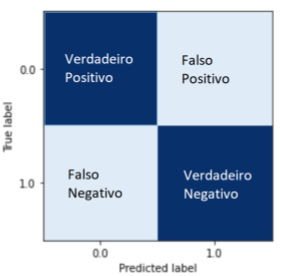

Após a classificação dos elementos pela modelagem preditiva, os resultados da predição são colocados em quatro diferentes quadrantes. Na diagonal principal (em azul escuro) estão os valores corretamente preditos, com Verdadeiros Positivos (VP) e Verdadeiros Negativos (VN). Fora dessa diagonal se encontram os erros cometidos, os Falsos Positivos (FN) e Falsos Negativos(FN) (Franceschi, 2019).

E a partir dos valores obtidos nos quadrantes, outras métricas podem ser extraídas, como a acurácia, com a seguinte fórmula:


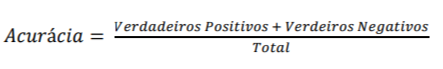

A acurácia é uma métrica simples que utiliza a razão entre todos os acertos do modelo (Verdadeiros Positivos e Verdadeiros Negativos) sobre a quantidade total de elementos usados na predição, ou seja, VP somado com VN, FP e FN.
E como a fórmula não utiliza um peso aplicado, é importante ressaltar que apenas utilizando a acurácia não é possível avaliar o desempenho dos modelos (Chen, et al, 2020).

#### Resultados

Como foi possivel observar acima, foram feitos 3 modelos para utilização dos resultados de BOW e do Word2Vec. Sendo eles:

1.   6.1 - Naive Bayes bag of words, com 0.72 de acurácia.
2.   6.2 - Naive Bayes Word2Vec, com 0.5 de acurácia.
1.   6.3 - Rede Neural Word2Vec, com 0.649 de acurácia.


Vale mencionar que a principal metrica utilizada para medir o desenpenho dos modelo foi a acurácia.

#### Matrizes de confusão

Também vale mencionar, que a rede Neural Word2VEC a matriz de confusão do modelo foi analisada, contendo 883 verdadeiros positivos, 628 falso positivos, 451 falso negativos e 1113 verdadeiros negativos. Indicando uma tendência do modelo a ter acertos mais precisos sobre comentários negativos. Sendo esse um bom indício, uma vez que essa é a classe mais importante de ser corretamente classificada.

#### Conclusão

Os resultados que tiveram os melhores resultados foram o do Naive Bayes com Bag of words e a rede neural com Word2Vec. Sendo o menor deles o Naive Bayes com Word2Vec, uma vez que ele não e um input adequado para o modelo. 
Ja entre os dois modelos com maiores resultados, o que se destacou foi o Naive Bayes com bag of words, se destacando com 7% a mais de acurácia que a rede neural.
Também sendo importante destacar a importância da aplicação de outras métricas de avaliação, como revocação, que identifica a relação entre Verdadeiros Positivos com Falsos Negativos.

### Referências

CHEN, D., NIGRI, E., OLIVEIRA, G.,SEPULVENE, L., ALVES, T.: Métricas de Avaliação em Machine Learning: Classificação - Kunumi Blog, medium, 2020.

FRANCESCHI, P, R.: Modelagens Preditivas de Churn: O Caso do Banco do Brasil, Universidade do Vale do Rio dos Sinos, 2019.